# Neural network with two layers

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm

# Fundamental functions

In [3]:
def initialisation(n0, n1, n2):

    W1 = np.random.randn(n1, n0)
    b1 = np.zeros((n1, 1))
    W2 = np.random.randn(n2, n1)
    b2 = np.zeros((n2, 1))

    parametres = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

    return parametres

In [4]:
def forward_propagation(X, parametres):

    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']

    Z1 = W1.dot(X) + b1
    A1 = 1 / (1 + np.exp(-Z1))

    Z2 = W2.dot(A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))

    activations = {
        'A1': A1,
        'A2': A2
    }

    return activations

In [5]:
def back_propagation(X, y, parametres, activations):

    A1 = activations['A1']
    A2 = activations['A2']
    W2 = parametres['W2']

    m = y.shape[1]

    dZ2 = A2 - y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims = True)

    dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims = True)

    gradients = {
        'dW1' : dW1,
        'db1' : db1,
        'dW2' : dW2,
        'db2' : db2
    }
    
    return gradients

In [6]:
def update(gradients, parametres, learning_rate):

    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']

    dW1 = gradients['dW1']
    db1 = gradients['db1']
    dW2 = gradients['dW2']
    db2 = gradients['db2']

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parametres = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

    return parametres

In [7]:
def predict(X, parametres):
  activations = forward_propagation(X, parametres)
  A2 = activations['A2']
  return A2 >= 0.5

In [14]:
def neural_network(X, y, n1=2, learning_rate = 0.1, n_iter = 10000):

    # initialisation parametres
    n0 = X.shape[0]
    n2 = y.shape[0]
    np.random.seed(0)
    parametres = initialisation(n0, n1, n2)

    train_loss = []
    train_acc = []
    history = []

    # gradient descent
    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X, parametres)
        A2 = activations['A2']

        # Plot courbe d'apprentissage
        train_loss.append(log_loss(y.flatten(), A2.flatten()))
        y_pred = predict(X, parametres)
        train_acc.append(accuracy_score(y.flatten(), y_pred.flatten()))
        
        #history.append([parametres.copy(), train_loss, train_acc, i])

        # mise a jour
        gradients = back_propagation(X, y, parametres, activations)
        parametres = update(gradients, parametres, learning_rate)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.legend()
    plt.show()
    print(train_loss[n_iter - 1])
    print(train_acc[n_iter - 1])
    return parametres

# Dataset

dimensions de X: (2, 1000)
dimensions de y: (1, 1000)


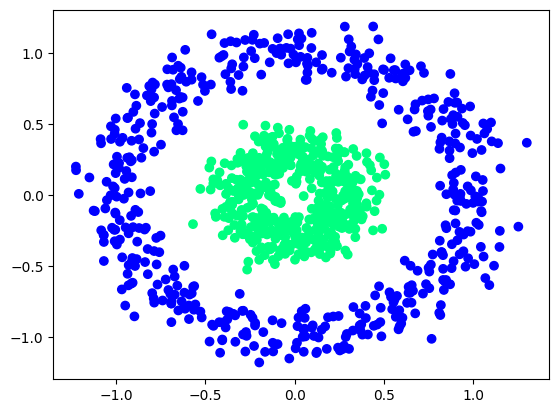

In [15]:
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='winter')
plt.show()

# Application of the model

100%|██████████| 10000/10000 [00:04<00:00, 2035.15it/s]


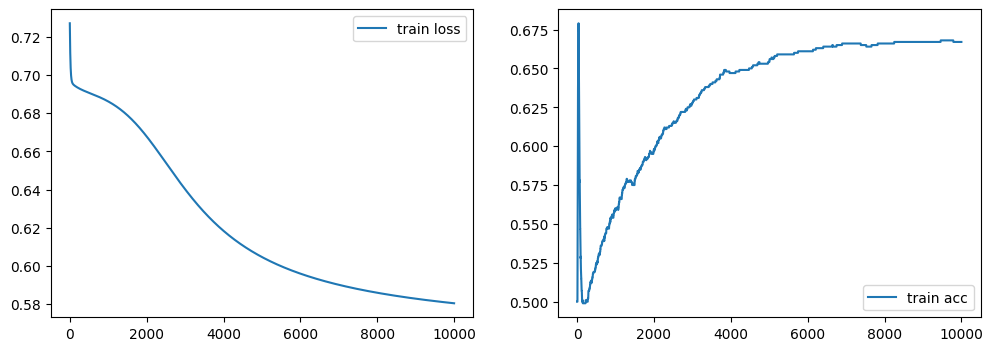

0.580460922493163
0.667


{'W1': array([[7.87948843, 1.17904418]]),
 'b1': array([[4.9850314]]),
 'W2': array([[4.55383429]]),
 'b2': array([[-4.08654645]])}

In [22]:
neural_network(X, y, n1=1) #n1=2,4,8,16,32

100%|██████████| 10000/10000 [00:04<00:00, 2012.45it/s]


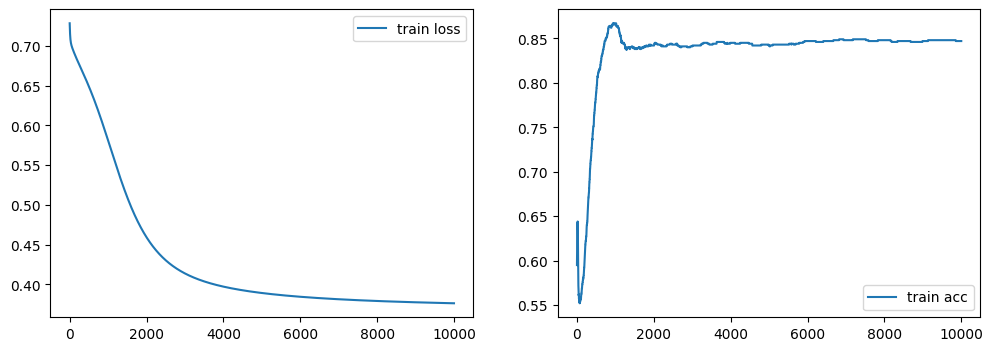

0.3763310013318917
0.847


{'W1': array([[5.57024783, 3.86439393],
        [5.78658794, 3.95817107]]),
 'b1': array([[ 3.51573889],
        [-3.86669224]]),
 'W2': array([[ 6.54981686, -7.56494895]]),
 'b2': array([[-4.52368306]])}

In [16]:
neural_network(X, y, n1=2) #n1=2,4,8,16,32

100%|██████████| 10000/10000 [00:05<00:00, 1953.52it/s]


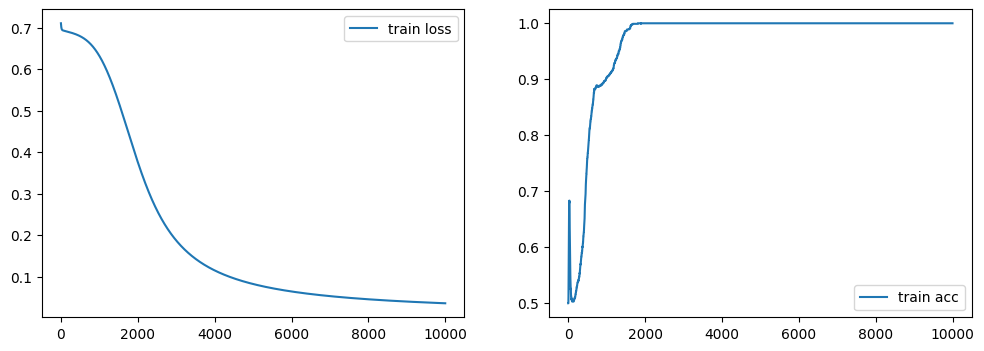

0.03556064410108551
0.999


{'W1': array([[ 7.43151541,  2.21540651],
        [ 1.71986302,  7.37827889],
        [ 5.44263891, -5.26700765]]),
 'b1': array([[ 3.72244554],
        [-3.68849255],
        [-3.75056123]]),
 'W2': array([[ 9.36476442, -9.86362333, -9.92354594]]),
 'b2': array([[-3.46295063]])}

In [23]:
neural_network(X, y, n1=3) #n1=2,4,8,16,32

100%|██████████| 10000/10000 [00:05<00:00, 1945.52it/s]


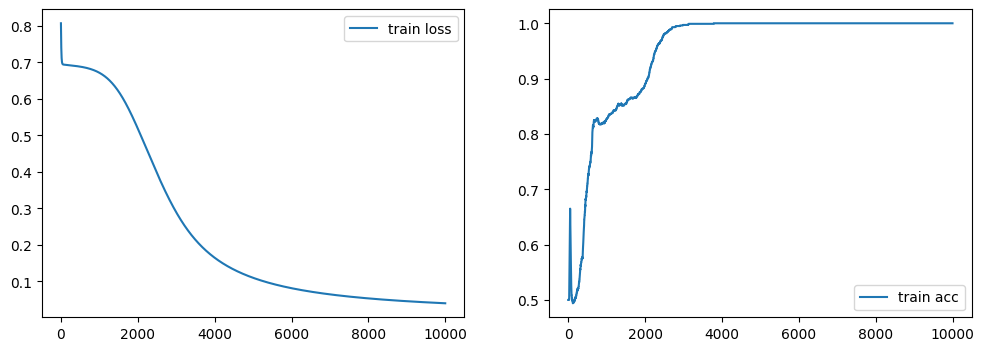

0.03986221808417014
1.0


{'W1': array([[ 5.1860014 ,  4.83036083],
        [ 2.18552381,  5.77694596],
        [ 2.77269811, -5.95272467],
        [ 6.77584762, -2.65109819]]),
 'b1': array([[-3.5793166 ],
        [ 3.27301208],
        [-3.36219134],
        [ 3.5042095 ]]),
 'W2': array([[-9.52900618,  4.37158043, -7.4770563 ,  8.67031582]]),
 'b2': array([[-7.0896726]])}

In [18]:
neural_network(X, y, n1=4) #n1=2,4,8,16,32

100%|██████████| 10000/10000 [00:06<00:00, 1634.92it/s]


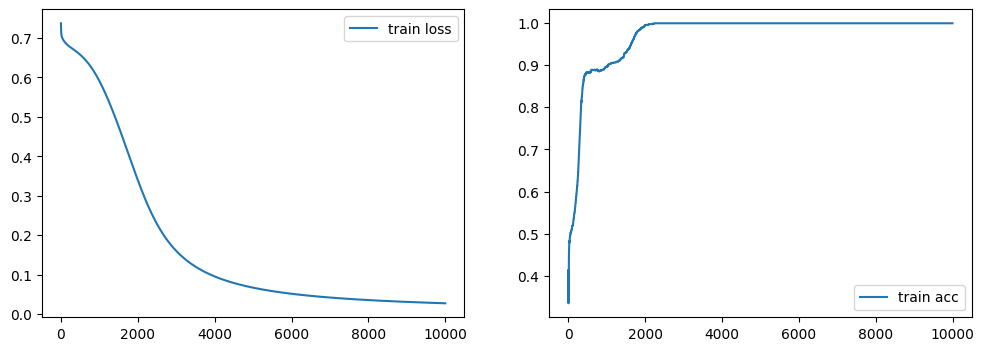

0.02743759376620315
0.999


{'W1': array([[ 7.33582417e+00,  1.47461002e+00],
        [ 1.21728960e-03,  6.28075330e+00],
        [ 2.06295927e+00, -1.02714774e+00],
        [ 5.24334256e+00, -4.30479839e+00],
        [ 3.21596836e+00,  3.92105673e+00],
        [ 1.53610362e-01,  5.41684323e+00],
        [ 5.40133547e-01,  1.88544544e-01],
        [-3.56282096e-01, -1.41223502e-01]]),
 'b1': array([[ 3.6357111 ],
        [-3.10209304],
        [ 0.68111928],
        [-3.34354709],
        [-2.55106579],
        [ 2.63948879],
        [ 0.23398231],
        [ 1.06787686]]),
 'W2': array([[ 9.17607535, -7.16523906,  0.43187753, -8.31243786, -5.98413487,
          4.47682193, -0.72103342, -2.97728145]]),
 'b2': array([[-4.00959414]])}

In [21]:
neural_network(X, y, n1=8) #n1=2,4,8,16,32

100%|██████████| 10000/10000 [00:19<00:00, 501.12it/s]


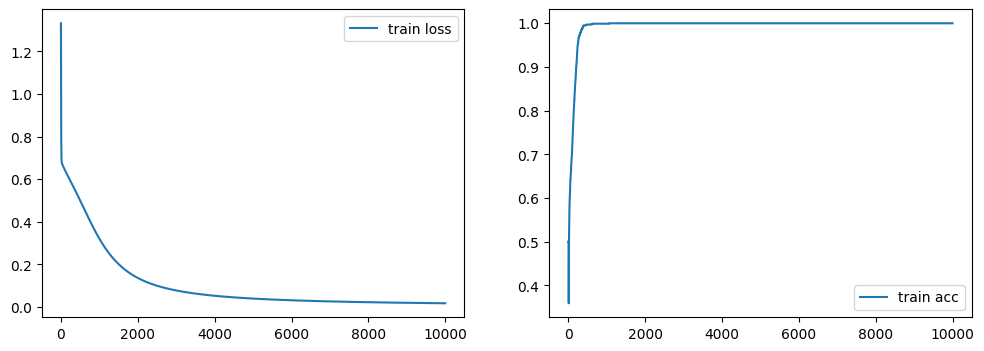

0.017014202951086483
1.0


{'W1': array([[ 3.43997472,  0.92079692],
        [ 1.40629524,  6.06880214],
        [ 2.39763497, -1.66813797],
        [ 1.06613384, -0.0949223 ],
        [ 0.50223448,  1.31617583],
        [ 1.00451191,  5.12773928],
        [ 0.66156444,  0.08519407],
        [ 0.33233635,  0.31873769],
        [ 3.19662297, -1.13222876],
        [ 0.44836544, -4.18555211],
        [-6.47306066, -0.10297057],
        [ 4.16745553, -2.86380568],
        [ 3.3008121 , -3.52855265],
        [-0.1982406 , -0.23597382],
        [ 3.76922199,  3.40290622],
        [ 0.54461539,  0.70078866]]),
 'b1': array([[-1.96174226],
        [-3.15789989],
        [-1.61012088],
        [ 0.18311593],
        [ 0.69587873],
        [ 2.85011117],
        [-0.11498244],
        [-0.01186519],
        [-2.00687969],
        [-2.26696975],
        [-3.19219297],
        [ 2.41412571],
        [-2.49901155],
        [ 0.09115885],
        [-2.52251509],
        [ 0.24414807]]),
 'W2': array([[-2.94196727, -7.38125393,

In [19]:
neural_network(X, y, n1=16) #n1=2,4,8,16,32

100%|██████████| 10000/10000 [00:21<00:00, 459.68it/s]


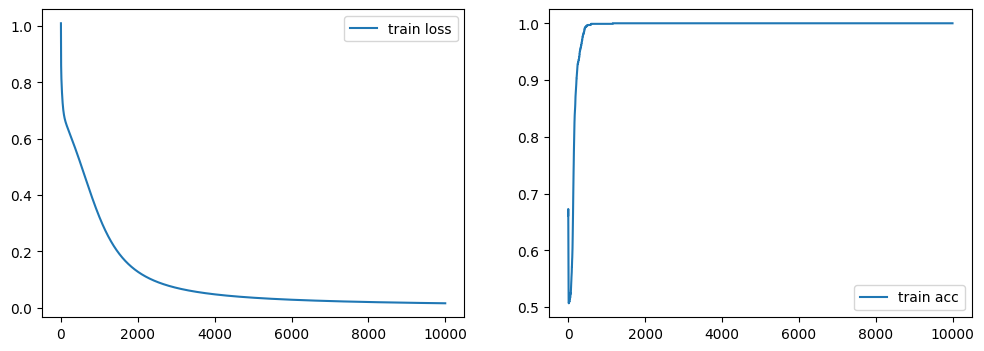

0.015559596949170572
1.0


{'W1': array([[ 1.88596152e+00,  3.91501721e-01],
        [ 1.24271024e+00,  4.77663993e+00],
        [ 4.74079813e+00, -1.88279633e+00],
        [ 1.11495746e+00, -2.75843544e-01],
        [-4.41675315e-01,  8.79897480e-01],
        [ 5.60518062e-02,  2.02952735e+00],
        [ 9.91121586e-01, -2.64774188e-02],
        [ 4.52443879e-01,  3.36676686e-01],
        [ 4.04452978e+00, -8.55166038e-01],
        [ 7.38674134e-02, -9.95987562e-01],
        [-3.02955466e+00,  7.93337900e-01],
        [ 1.04533968e+00, -8.55593723e-01],
        [ 3.73432926e+00, -2.67019734e+00],
        [-7.34790328e-02, -1.00603937e-02],
        [ 2.82358780e+00,  2.56388749e+00],
        [ 1.37230890e-01,  4.01963094e-01],
        [-2.56896283e+00, -4.73455165e+00],
        [-1.77165332e-01, -2.31014618e-03],
        [ 1.54120023e+00,  1.37530658e+00],
        [-1.24344509e+00,  1.24300868e-01],
        [-1.98710863e+00, -4.45640126e+00],
        [-2.84692957e+00,  5.04685093e+00],
        [-3.33625611e-01, 

In [20]:
neural_network(X, y, n1=32) #n1=2,4,8,16,32